In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180,180, size = 1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=93e8da1e2881e96791828dd0b6a4443b


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kamaishi
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | kushalgarh
Processing Record 6 of Set 1 | jasper
Processing Record 7 of Set 1 | yumen
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | naze
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | halifax
Processing Record 13 of Set 1 | halalo
City not found. Skipping...
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | costa rica
Processing Record 21 of Set 1 | novo aripuana
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23

Processing Record 36 of Set 4 | luderitz
Processing Record 37 of Set 4 | nikolskoye
Processing Record 38 of Set 4 | grabouw
Processing Record 39 of Set 4 | saint-georges
Processing Record 40 of Set 4 | pierre
Processing Record 41 of Set 4 | coldingham
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | sangar
Processing Record 44 of Set 4 | alofi
Processing Record 45 of Set 4 | patrasaer
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | caravelas
Processing Record 48 of Set 4 | kenai
Processing Record 49 of Set 4 | margate
Processing Record 50 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | terenga
City not found. Skipping...
Processing Record 2 of Set 5 | bambous virieux
Processing Record 3 of Set 5 | vao
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | ancud
Processing Record 6 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 5 | eydhafushi
Processing Record 8 of Set 

City not found. Skipping...
Processing Record 24 of Set 8 | edson
Processing Record 25 of Set 8 | airai
Processing Record 26 of Set 8 | manokwari
Processing Record 27 of Set 8 | san joaquin
Processing Record 28 of Set 8 | panapakkam
City not found. Skipping...
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | cabo san lucas
Processing Record 31 of Set 8 | kruisfontein
Processing Record 32 of Set 8 | ahuimanu
Processing Record 33 of Set 8 | rocha
Processing Record 34 of Set 8 | fairbanks
Processing Record 35 of Set 8 | vostok
Processing Record 36 of Set 8 | benidorm
Processing Record 37 of Set 8 | lebedyn
Processing Record 38 of Set 8 | balakirevo
Processing Record 39 of Set 8 | samfya
Processing Record 40 of Set 8 | villa rica
Processing Record 41 of Set 8 | andenes
Processing Record 42 of Set 8 | la ronge
Processing Record 43 of Set 8 | pisco
Processing Record 44 of Set 8 | aliganj
Processing Record 45 of Set 8 | taua
Processing Record 46 of Set 8 | norman wells
Pro

City not found. Skipping...
Processing Record 12 of Set 12 | bereda
Processing Record 13 of Set 12 | timmins
Processing Record 14 of Set 12 | mudhol
Processing Record 15 of Set 12 | punuare
Processing Record 16 of Set 12 | avera
Processing Record 17 of Set 12 | itarema
Processing Record 18 of Set 12 | bengkulu
Processing Record 19 of Set 12 | gusau
Processing Record 20 of Set 12 | sambava
Processing Record 21 of Set 12 | mandalgovi
Processing Record 22 of Set 12 | rio gallegos
Processing Record 23 of Set 12 | chagda
City not found. Skipping...
Processing Record 24 of Set 12 | geraldton
Processing Record 25 of Set 12 | palana
Processing Record 26 of Set 12 | benalla
Processing Record 27 of Set 12 | dali
Processing Record 28 of Set 12 | phuket
Processing Record 29 of Set 12 | deer lake
Processing Record 30 of Set 12 | araouane
Processing Record 31 of Set 12 | akhaldaba
Processing Record 32 of Set 12 | urumqi
Processing Record 33 of Set 12 | andover
Processing Record 34 of Set 12 | mitsam

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kamaishi,39.27,141.88,49.71,73,100,4.99,JP,2020-05-05 20:08:36
1,Albany,42.60,-73.97,57.99,23,74,5.01,US,2020-05-05 20:05:02
2,Busselton,-33.65,115.33,48.99,98,99,29.35,AU,2020-05-05 20:08:37
3,Bredasdorp,-34.53,20.04,59.00,93,40,1.57,ZA,2020-05-05 20:08:37
4,Kushalgarh,23.20,74.45,86.56,22,0,4.32,IN,2020-05-05 20:08:37
5,Jasper,37.20,-94.35,70.00,37,1,14.99,US,2020-05-05 20:08:38
6,Yumen,40.28,97.20,54.18,60,100,8.88,CN,2020-05-05 20:08:38
7,Atuona,-9.80,-139.03,80.80,76,26,16.17,PF,2020-05-05 20:08:38
8,Sitka,57.05,-135.33,48.20,70,90,14.99,US,2020-05-05 20:08:38
9,Naze,28.37,129.48,73.40,100,90,4.70,JP,2020-05-05 20:08:38


In [17]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kamaishi,JP,2020-05-05 20:08:36,39.27,141.88,49.71,73,100,4.99
1,Albany,US,2020-05-05 20:05:02,42.60,-73.97,57.99,23,74,5.01
2,Busselton,AU,2020-05-05 20:08:37,-33.65,115.33,48.99,98,99,29.35
3,Bredasdorp,ZA,2020-05-05 20:08:37,-34.53,20.04,59.00,93,40,1.57
4,Kushalgarh,IN,2020-05-05 20:08:37,23.20,74.45,86.56,22,0,4.32
5,Jasper,US,2020-05-05 20:08:38,37.20,-94.35,70.00,37,1,14.99
6,Yumen,CN,2020-05-05 20:08:38,40.28,97.20,54.18,60,100,8.88
7,Atuona,PF,2020-05-05 20:08:38,-9.80,-139.03,80.80,76,26,16.17
8,Sitka,US,2020-05-05 20:08:38,57.05,-135.33,48.20,70,90,14.99
9,Naze,JP,2020-05-05 20:08:38,28.37,129.48,73.40,100,90,4.70


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time

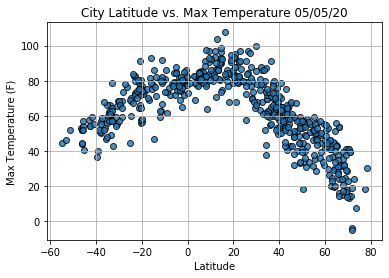

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

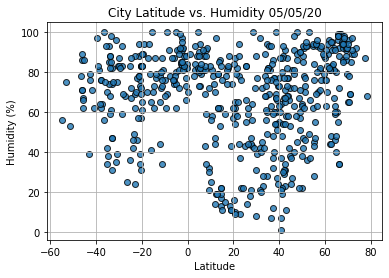

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

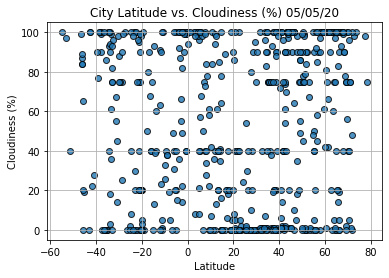

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

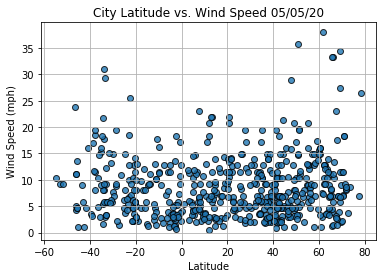

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()